# Modos normales de oscilación: sistema con dos grados de libertad
Víctor A. Bettachini  
bettachini@df.uba.ar  
Copyright Departamento de Física, Facultad de Ciencias Exactas y Naturales, Universidad de Buenos Aires

## Red de resortes

![Figura: sistema a resolver](./resortes_acoplados.jpg)

Considere el sistema de la figura, en el que se tienen dos part ́ıculas de masamunidas a las paredescon resortes verticales de longitud natural $l_0 (l_0< L/2)$ y constante $k_1$, y con resortes horizontales $l_0= 0$ (slinkies) y constante $k_2$.
Imagine que las partículas tienen la libertad de moverse en el plano y que la gravedad no les afecta.

a ¿Bajo qué aproximaciones es posible decir que el movimiento más general posible de cada una de las masas es una superposición lineal del movimiento más general posible de las oscilaciones longitudinales y de las oscilaciones transversales?
  Demuestre su afirmación.  
b. Considerando la aproximación del punto anterior, determine las frecuencias propias y los modos normales de oscilación: longitudinales, transversales y de la solución más general posible para un movimiento arbitrario en el plano.

In [49]:
import sympy as sy
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from sympy import solve, Eq
init_vprinting()
psiax, psiay, psibx, psiby = sy.physics.mechanics.dynamicsymbols(
    'psi_{ax} psi_{ay} psi_{bx} psi_{by}')
V, omegax1, omegax2, omegay1, omegay1 = sy.symbols(
    'V omega_{x1} omega_{x2} omega_{y1} omega_{y2}')
m, k1, k2, l0, L, d, t = sy.symbols(
    'm k_1 k_2 l_0 L d t')
l1, l2, l3= sy.symbols(
    'l_1 l_2 l_3')
lI, lII, lIII, lIV= sy.symbols(
    'l_I l_{II} l_{III} l_{IV}')

## Potencial del sistema
Empezamos preguntandonos que potenciales están en juego.
En este caso solo los elásticos de los resortes, ya que quitamos del análisis efectos gravitatorios.

Nos queda la tarea de escibir las longitudes de todos los resortes.
Para esto primero hay que establecer un sistema de coordenadas.
Resulta cómodo uno centrada en la posición de reposo de alguna de las partículas, la de la izquierda por ejemplo que llamaremos $a$.
Como analizamos pequeñas oscilaciones su posición será un pequeño apartamiento $\psi$ desde allí
$$
\vec{r}_a =  \psi_{ax} \hat{x}+ \psi_{ay} \hat{y},
$$
con $\hat{x}$ apuntando a la derecha del dibujo, e $\hat{y}$ hacia arriba.

Lo mismo para la otra partícula
$$
\vec{r}_b = \left( d+ \psi_{bx} \right) \hat{x}  + \psi_{by} \hat{y}.
$$

Con esto podemos escribir las longitudes de los resortes en la dirección de la línea que atraviesa estas partículas:
$$
\begin{aligned}
l_1 &= |\vec{r}_a- (-d \hat{x})|= \sqrt{(d+ \psi_{ax}) ^2 + \psi_{ay}^2} \\
l_2 &= |\vec{r}_b - \vec{r}_a| = \sqrt{(d+ \psi_{bx}- \psi_{ax})^2 + (\psi_{by}- \psi_{ay})^2} \\
l_3 &= |(2d \hat{x})- \vec{r}_b|= \sqrt{(d- \psi_{bx}) ^2 + \psi_{by}^2}
\end{aligned}
$$

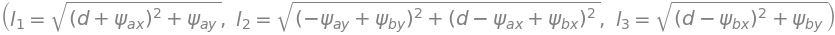

In [50]:
l_1 = sy.sqrt((d + psiax)**2+ psiay)
l_2 = sy.sqrt( (d + psibx - psiax)**2 + ( psiby- psiay )**2 )
l_3 = sy.sqrt((d - psibx)**2+ psiby)
sy.Eq(l1, l_1), sy.Eq(l2, l_2), sy.Eq(l3, l_3)

Lo mismo con los resortes en la dirección transversal a la anterior
$$
\begin{aligned}
l_I &= |L \hat{y}- \vec{r}_a|= \sqrt{ \psi_{ax}^2 + (L/2 - \psi_{ay})^2} \\
l_{II} &= |\vec{r}_a- (-L \hat{y})|= \sqrt{ \psi_{ax}^2 + (L/2 + \psi_{ay})^2} \\
l_{III} &= |L \hat{y}- \vec{r}_b|= \sqrt{ \psi_{bx}^2 + (L/2 - \psi_{by})^2} \\
l_{IV} &= |\vec{r}_b- (-L \hat{y})|= \sqrt{ \psi_{bx}^2 + (L/2 + \psi_{by})^2}
\end{aligned}
$$

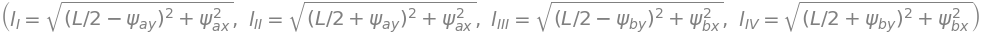

In [51]:
l_I= sy.sqrt(psiax**2+ (L/2 - psiay)**2)
l_II= sy.sqrt(psiax**2+ (L/2 + psiay)**2)
l_III= sy.sqrt(psibx**2+ (L/2 - psiby)**2)
l_IV= sy.sqrt(psibx**2+ (L/2 + psiby)**2)
sy.Eq(lI, l_I), sy.Eq(lII, l_II), sy.Eq(lIII, l_III), sy.Eq(lIV, l_IV)

Para escribir el potencial elástico de cada uno debemos recordar que los "longitudinales" son _slinkies_ ($l_0=0$), en tanto que los dispuestos "transversalmente" tiene una longitud natural no nula $l_o < L/2$ según el enunciado.
El potencial del sistema así modelado para pequeñas oscilaciones de $a$ y $b$ es
$$
\begin{aligned}
V(\psi_{ax}, \psi_{bx}, \psi_{ay}, \psi_{by} ) =&
\frac{k_2}{2} 
\left[
l_1^2 + l_2^2+ l_3^2
\right] \\
&+ \frac{k_1}{2} \left[
(l_{I}- l_0)^2 + (l_{II}- l_0)^2 + (l_{III}- l_0)^2 + (l_{IV}- l_0)^2
\right] \\
=& \frac{k_2}{2} \left[
(d+ \psi_{ax}) ^2 + \psi_{ay}^2 + (d+ \psi_{bx}- \psi_{ax})^2 + (\psi_{by}- \psi_{ay})^2 + (d- \psi_{bx}) ^2 + \psi_{by}^2
\right] \\
&+ \frac{k_1}{2} \left[
  \left( \sqrt{ \psi_{ax}^2 + (L/2 - \psi_{ay})^2} - l_0 \right)^2
+ \left( \sqrt{ \psi_{ax}^2 + (L/2 + \psi_{ay})^2} - l_0 \right)^2
+ \left( \sqrt{ \psi_{bx}^2 + (L/2 - \psi_{by})^2} - l_0 \right)^2
+ \left( \sqrt{ \psi_{bx}^2 + (L/2 + \psi_{by})^2} - l_0 \right)^2
\right]
\end{aligned}
$$

Esto es mejor no desarmarlo pues al derivar para obtener las fuerzas los cuadrados se van y quedan expresiones más sencillas.

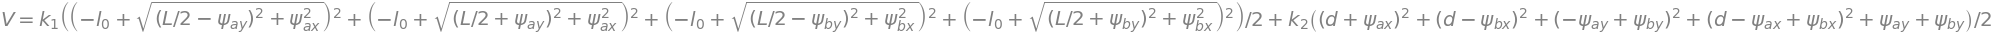

In [52]:
pot= (k2/2) * ( l_1**2+ l_2**2+ l_3**2 ) \
    + (k1/2) * ( (l_I - l0)**2 + (l_II - l0)**2 + (l_III - l0)**2 + (l_IV - l0)**2 )
potencial= sy.Eq(V,pot)
potencial

## Obteniendo las fuerzas y planteando la 2.a ley de Newton
Hay que analizar para cada partícula que oscila. Para la $a$ bastaría con derivar respecto a sus coordenadas
$\vec{F}_a = - \vec{\nabla}_a V(\psi_{ax}, \psi_{bx}, \psi_{ay}, \psi_{by} ) = - \left( \frac{\mathrm{d}}{\mathrm{d} \psi_{ax}} V \hat{x} + \frac{\mathrm{d}}{\mathrm{d} \psi_{ay}} V \hat{y} \right) $.

Empecemos por las llamadas oscilaciones longitudinales, en la dirección de la línea que atraviesa esta párticula y la $b$ nos limitamos a
$$
 m \ddot{x}_a =  m \ddot{\vec{r}}_{a} \cdot \hat{x}= m \ddot{\psi}_{ax} = \vec{F}_a \cdot \hat{x} = - \frac{\mathrm{d}}{\mathrm{d} \psi_{ax}} V
$$
que luego de algunas cuentas queda

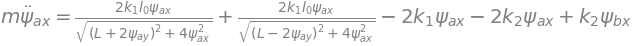

In [67]:
f_ax= (-1)* sy.diff(pot,psiax).simplify()
sy.Eq(m * psiax.diff().diff(), f_ax)

Acá hacemos uso de la operación de sacar el $L$ de las raices, que quedan en el denominador.
Dentro de las raices quedarán fracciones las fracciones $\left( \frac{\psi_{ax}}{L} \right)^2$ y $\left( \frac{\psi_{ay}}{L} \right)^2$.
Puesto que $\psi_{ax}, \psi_{ay} \ll L \implies$ los cuadrados de tales fracciones pueden despreciarse.
Así queda

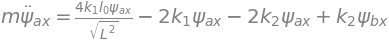

In [70]:
f_axS= f_ax.expand().subs([(psiax**2,0),(psiay**2,0),(L*psiay,0)]).simplify()
sy.Eq(m * psiax.diff().diff(), f_axS)